# Data visualisation task 

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html) 

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Load data
car_data = pd.read_csv('Cars93.csv', index_col = 0, keep_default_na=False) 
print(car_data.columns)

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')


### 1. Boxplot

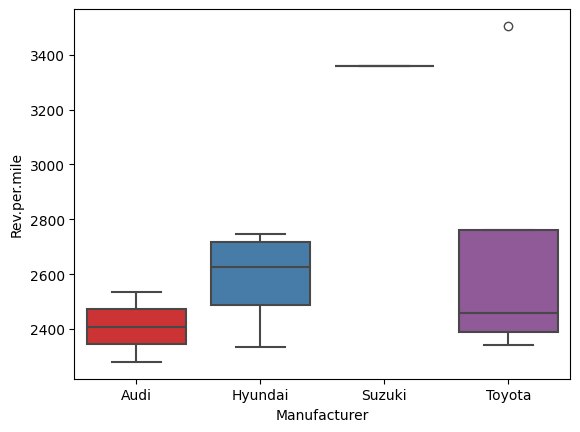

In [3]:
# Get the selected manufacturers as a list and then make it a dataframe
Manufacturers = ["Audi", "Hyundai", "Suzuki", "Toyota"]
selected_cars = car_data[car_data['Manufacturer'].isin(Manufacturers)]

# Boxplot for revs per mile
sns.boxplot(x="Manufacturer", y="Rev.per.mile", hue="Manufacturer", 
            data = selected_cars, palette ="Set1", linewidth = 1.5)
plt.show()

**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?


**Boxplot answer:**
Suzuki

### 2. Histogram

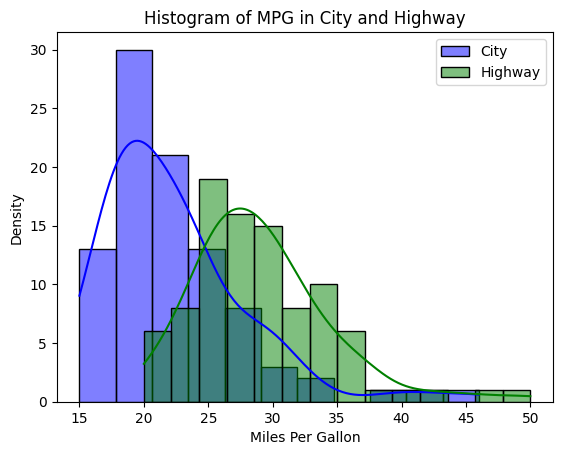

In [4]:
# Histogram of MPG
sns.histplot(car_data['MPG.city'], color='blue', label='City', kde=True)
sns.histplot(car_data['MPG.highway'], color='green', label='Highway', kde=True)

plt.xlabel('Miles Per Gallon')
plt.ylabel('Density')
plt.title('Histogram of MPG in City and Highway')
plt.legend()
plt.show()


**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

**Histogram answer:**
On the highway.

### 3. Lineplot

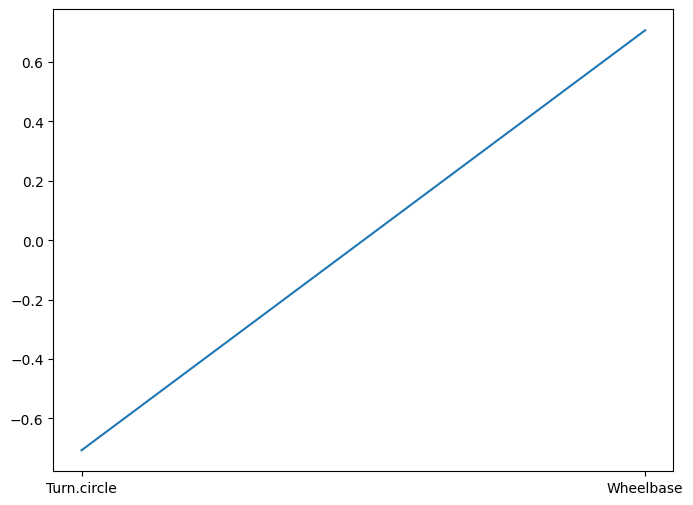

In [5]:
# Lineplot (Wheelbase vs turning circle)

# Start by calculating average wheel base and turn circle for each manufacturer
average_data = car_data[['Turn.circle','Wheelbase']].mean()

# Normalise the data
normalised_data = (average_data - average_data.mean()) / average_data.std()

#Create the lineplot
plt.figure(figsize=(8,6))
parallel_plot = sns.lineplot(normalised_data.transpose(),
                             dashes=False,
                             markers=True,
                             markersize = 8)
plt.show()

**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?

**Lineplot answer:**  
It is a linear directly proportional relationship.
As wheelbase increases, turning circle increases. 

### 4. Barplot

['Small' 'Midsize' 'Compact' 'Large' 'Sporty' 'Van']
Average Small HP is:  91.0
Average Midsize HP is:  173.0909090909091
Average Compact HP is:  131.0
Average Large HP is:  179.45454545454547
Average Sporty HP is: 160.14285714285714
Average Van HP is: 149.44444444444446


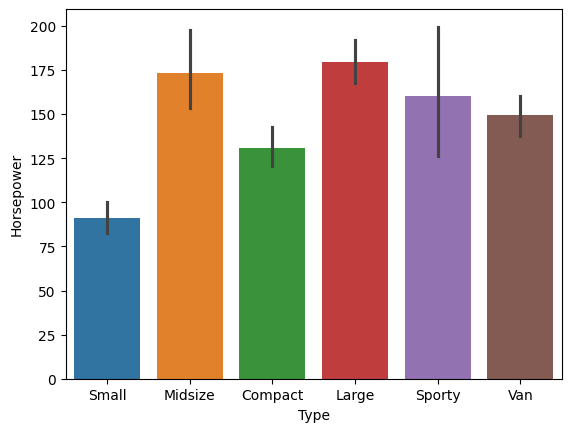

In [6]:
# Barplot for mean horsepower
print(car_data['Type'].unique())

#All sizes can now be compared with HP and calculated mean 
df_small = car_data[car_data['Type'] == 'Small']
small_hp = df_small['Horsepower'].mean()
print("Average Small HP is: ",small_hp)

df_midsize = car_data[car_data['Type'] == 'Midsize']
mid_hp = df_midsize['Horsepower'].mean()
print("Average Midsize HP is: ",mid_hp)

df_compact = car_data[car_data['Type'] == 'Compact']
comp_hp = df_compact['Horsepower'].mean()
print("Average Compact HP is: ",comp_hp)

df_large = car_data[car_data['Type'] == 'Large']
large_hp = df_large['Horsepower'].mean()
print("Average Large HP is: ",large_hp)

df_sporty = car_data[car_data['Type'] == 'Sporty']
sporty_hp = df_sporty['Horsepower'].mean()
print("Average Sporty HP is:",sporty_hp)

df_van = car_data[car_data['Type'] == 'Van']
van_hp = df_van['Horsepower'].mean()
print("Average Van HP is:",van_hp)

# Create the barplot using categories 
sns.barplot(x="Type", y="Horsepower",
            hue = 'Type', data = car_data)
plt.show()


**Barplot question:**  
Does a larger car mean more horsepower?



**Barplot answer:**
 Dimensions specifics would be useful, but going off descriptors alone, assuming sporty could be larger than midsize, the answer is no on average. 
 If the sizes go from small -> compact -> sporty -> midsize -> large, and van is not included (as it is not a car), then the answer is yes on average.